# Import all the required libraries 

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#inline statement - displays the graphs in the current notebook
% matplotlib inline
from sklearn.model_selection import train_test_split, LeaveOneOut, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn import preprocessing

Let us load the modified csv file from the previous notebook **house_prices_cleaned.csv**

In [2]:
house_prices_new = pd.read_csv("E:\Data Science\Capstone Project - House prices\Regression\\house_prices_cleaned.csv")

In [3]:
house_prices_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


# Data Standardization

Standardization is very important when we are comparing measurements that have different units. Standardization should be performed to make sure that all the features are on the same scale so that they can be compared for analyzing results.

**Data Standardization:** Standardization (or Z-score normalization) is the process where the features are rescaled so that they’ll have the properties of a standard normal distribution with μ=0 and σ=1, where μ is the mean (average) and σ is the standard deviation from the mean.

- Standardization can be done using scale() function or StandardScaler class.
- StandardScaler is preferred over sacle() as it implements the Transformer API to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set.

In [4]:
house_prices_new[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
     'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
     'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea',
     'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']] = StandardScaler().fit_transform(house_prices_new[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
                                       'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                                       '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
                                       'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                                       'GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                                       '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']])

In [5]:
house_prices_new.shape

(1460, 81)

# Encode the categorical data

To perform Regression Analysis all the data should be in numerical form. Since our data frame contains categorical data too, this should be converted into numerical for further analysis. A good way to convert categorical data into numerical is One Hot Encoding. 

**One Hot Encoding -** One Hot Encoding is a representation of categorical variables as binary vectors. This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

get_dummies function is used to produce a resultant binary matrix 

In [6]:
# Used get_dummies to produce binary matrix dummy variables 
new_house_prices = pd.get_dummies(house_prices_new, columns=['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig',
                                                'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                                                'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
                                                'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                                                'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
                                                'Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
                                                'PavedDrive','PoolQC', 'Fence', 'MiscFeature','SaleType','SaleCondition'])

After One hot encoding the number of variables have increased because dummy variables have been introduced to the resultant matrix

In [7]:
new_house_prices.shape

(1460, 306)

In [8]:
new_house_prices.isnull().values.any()

False

In [9]:
new_house_prices.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0.073375,-0.225902,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511514,0.575425,...,0,0,0,1,0,0,0,0,1,0
1,2,-0.872563,0.425052,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.573359,1.171992,...,0,0,0,1,0,0,0,0,1,0
2,3,0.073375,-0.095711,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323322,0.092907,...,0,0,0,1,0,0,0,0,1,0
3,4,0.309859,-0.442886,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.573359,-0.499274,...,0,0,0,1,1,0,0,0,0,0
4,5,0.073375,0.598640,0.375148,1.374795,-0.517200,0.951632,0.733308,1.363915,0.463568,...,0,0,0,1,0,0,0,0,1,0


In [10]:
# Make csv copy of new_house_prices
#new_house_prices.to_csv('E:\Data Science\Capstone Project - House prices\Regularization\\final_house_prices.csv', index=False)

In [11]:
# Create a new data frame house_prices_new_numerical which contains columns that are of type numerical 
house_prices_new_numerical = house_prices_new.select_dtypes(include = [np.number])

It is worthwhile to check if the number of columns that result from introducing the dummy variables is correct wrt the number of unique values per categorical variables.

In the code below I compute the aggregation of the no. of unique values per categorical variable to check that the no. of columns is equals to the no. of columns for non-categorical variables plus the number computed below.

In [12]:
# No of columns produced only by categorical variables
s = 0
for col in house_prices_new:
    if house_prices_new[col].dtype == 'object':
        s  = s + house_prices_new[col].nunique()  

# No of numerical columns 
n = len(house_prices_new_numerical.columns)

In [13]:
# The total number of columns produced after One Hot Encoding will be the sum of 's' and 'n'
total_cols = s+n
total_cols
if len(new_house_prices.columns) == total_cols:
    print("Column numbers match: %s" % total_cols)

Column numbers match: 306


# Split the data into test and train data sets

It is extremely important to split the data into train and test sets. Train set is used to train the model and Test set is used to test the performance of the model.

Problems encountered if train test split not performed:
- It does not make sense to talk about the performance of the model by testing it on same data. The model learns the data pretty well and when tested on same data will produce the best score.
- The model becomes very specific to the training data, so far as they even get trained on the ocassional erroneous labels present in the training data. This results in **Overfitting** and the model might not work well outside the training data.

Therefore it is advised to keep a certian portion of the data aside (test set) untouched and test our model on this data to evaluate the true performance of the model.

- X_train - all the predictors
- Y_train - target variable (SalePrice)
- X_test - all the predictors
- Y_test - target variable (SalePrice)

Let's define X and Y before splitting the data

In [14]:
X = new_house_prices.drop('SalePrice', axis=1)

In [15]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, new_house_prices.SalePrice, test_size=0.3, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1022, 305)
(438, 305)
(1022,)
(438,)


# Regression Analysis

Let us perform Multiple Linear Regression to analyze the relationship between independent and target variables. 

**Multiple linear regression -** It is a predictive analysis tool which is used to explain the relationship between one continuous dependent variable and two or more continuous/ categorical independent variables.  

** Multiple Linear Regression**

In [16]:
# Create an object lm for the LinearRegression model
lm = LinearRegression()
# Fit the model on the training data
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

This is very uselful table which gives out $R^2$, adjusted $R^2$, coefficients of all the numerical variables along with p-values, standard errors, t-statistic and confidence interval for 2 standard deviations. Let us concentrate on coefficients, some are negative and others are positive. The positive correlation signifies a stronger correlation of the feature with the predictor.

In [17]:
import statsmodels.api as sm
X = house_prices_new[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea',
        'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
        'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt',
        'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal',
        'MoSold','YrSold']]
Y = house_prices_new['SalePrice']
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

C:\Users\nikhi_000\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     6.343
Date:                Wed, 29 Nov 2017   Prob (F-statistic):           5.86e-26
Time:                        01:09:14   Log-Likelihood:                -19772.
No. Observations:                1460   AIC:                         3.961e+04
Df Residuals:                    1426   BIC:                         3.979e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass    -7751.6575   6255.474     -1.239      0.215      -2e+04    4519.262
LotFrontage   -1534.7682   5948.077     -0.258      0.796   -1.32e+04    1.01e+04
LotArea        4309.4956   5442.596      0.792      0.429   -6366.859     1.5e+04
OverallQual    2.404e+04   8801.436      2.732      0.006    6776.092    4.13e+04
OverallCond    5186.2497   6161.811      0.842      0.400   -6900.937    1.73e+04
YearBuilt      8378.9476   1.08e+04      0.775      0.438   -1.28e+04    2.96e+04
YearRemodAdd   2823.7228   7593.014      0.372      0.710   -1.21e+04    1.77e+04
MasVnrArea     5626.2114   5755.739      0.977      0.328   -5664.412    1.69e+04
BsmtFinSF1     4328.7757   5429.140      0.797      0.425   -6321.182     1.5e+04
BsmtFinSF2     -228.5180   4970.623     -0.046      0.963   -9979.036    9522.000
BsmtUnfSF      -199.8616   4702.380     -0.043      0.966   -9424.185    9024.462
TotalBsmtSF    4215.0611   6698.308      0.629      0.529   -8924.534    1.74e+04
1stFlrSF       8564.0716   7957.913      1.076      0.282   -7046.401    2.42e+04
2ndFlrSF       9559.1067   6935.754      1.378      0.168   -4046.270    2.32e+04
LowQualFinSF     -7.3055   5164.098     -0.001      0.999   -1.01e+04    1.01e+04
GrLivArea      1.424e+04   7239.642      1.967      0.049      39.253    2.84e+04
BsmtFullBath   4793.3480   7264.324      0.660      0.509   -9456.561     1.9e+04
BsmtHalfBath    457.6175   5239.316      0.087      0.930   -9819.977    1.07e+04
FullBath       1887.1767   8375.684      0.225      0.822   -1.45e+04    1.83e+04
HalfBath       -943.8989   7178.262     -0.131      0.895    -1.5e+04    1.31e+04
BedroomAbvGr  -8200.3334   7444.890     -1.101      0.271   -2.28e+04    6403.777
KitchenAbvGr  -2636.0392   6153.485     -0.428      0.668   -1.47e+04    9434.814
TotRmsAbvGrd   8220.8485   1.08e+04      0.763      0.446   -1.29e+04    2.94e+04
Fireplaces     2519.7661   6138.898      0.410      0.682   -9522.474    1.46e+04
GarageYrBlt    2710.9325   8818.667      0.307      0.759   -1.46e+04       2e+04
GarageCars     8312.3492   1.15e+04      0.723      0.470   -1.42e+04    3.09e+04
GarageArea     -820.5652   1.14e+04     -0.072      0.943   -2.32e+04    2.15e+04
WoodDeckSF     2994.1661   5381.681      0.556      0.578   -7562.696    1.36e+04
OpenPorchSF    -179.1728   5386.176     -0.033      0.973   -1.07e+04    1.04e+04
EnclosedPorch   701.9129   5522.835      0.127      0.899   -1.01e+04    1.15e+04
3SsnPorch       595.4686   4931.294      0.121      0.904   -9077.901    1.03e+04
ScreenPorch    3111.9090   5137.736      0.606      0.545   -6966.422    1.32e+04
PoolArea      -1163.2670   5116.441     -0.227      0.820   -1.12e+04    8873.292
MiscVal        -392.3765   4934.544     -0.080      0.937   -1.01e+04    9287.367
MoSold         -117.1390   4997.339     -0.023   

Let us look at all the features and thier respective coefficients.

In [18]:
# Features and their respective coefficients
coeffs_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['Features', 'Estimated_Coefficients'])
coeffs_df.sort_values(by='Estimated_Coefficients', ascending=False)

,Features,Estimated_Coefficients
33,MiscVal,21298.626224
16,BsmtFullBath,15327.722992
14,LowQualFinSF,14026.806738
4,OverallCond,10836.631181
6,YearRemodAdd,10465.033786
3,OverallQual,8831.872085
12,1stFlrSF,8304.026483
9,BsmtFinSF2,6891.937360
5,YearBuilt,6805.543499
13,2ndFlrSF,5140.709475


- From the Exploratory analysis the top five features highly correlated with Sale Price are OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF.
- After performing Regression the features with higher postive coefficients are MiscVal, BsmtFullBath, LowQualFinSF, OverallCond, YearRemodAdd. 
- We can clearly observe that results are quite different. The OverallQual/ OverallCond which is simply the present condition of the house seems to influence the price the house.
- Miscellaneous value (highest coefficient) is the value of miscellaneous features like Elevator, Garage, Shed, Tennis court etc., therefore having these aminities bumps up the price of the house.
- According to Regression analysis other features such as Full bath in basement, Low quality finished square foot, Remodel date of the house, and square footage increases/ decreases the price of a house.

Let us have a closer look at the coefficients to explore the linear and non-linear relationship of the features with the target variable 'Sale Price'

In [19]:
pos_coeffs_df= coeffs_df[(coeffs_df['Estimated_Coefficients'] >= 0)].sort_values(by='Estimated_Coefficients', ascending=False)
#pos_coeffs_df.sort_values(by='Estimated_Coefficients', ascending=False)
pos_coeffs_df

,Features,Estimated_Coefficients
33,MiscVal,21298.626224
16,BsmtFullBath,15327.722992
14,LowQualFinSF,14026.806738
4,OverallCond,10836.631181
6,YearRemodAdd,10465.033786
3,OverallQual,8831.872085
12,1stFlrSF,8304.026483
9,BsmtFinSF2,6891.937360
5,YearBuilt,6805.543499
13,2ndFlrSF,5140.709475


In [20]:
neg_coeffs_df = coeffs_df[(coeffs_df['Estimated_Coefficients'] < 0)].sort_values(by='Estimated_Coefficients', ascending = True)
neg_coeffs_df

,Features,Estimated_Coefficients
22,TotRmsAbvGrd,-3429.718480
21,KitchenAbvGr,-2904.693587
25,GarageCars,-1489.893249
15,GrLivArea,-1152.076289
35,YrSold,-1136.824685
1,LotFrontage,-626.091765
20,BedroomAbvGr,-217.771808
30,3SsnPorch,-158.479333
34,MoSold,-81.729301


- Features like MiscVal, BsmtFullBath, LowQualFinSF, OverallCond, YearRemodAdd have linear correlation with Sale Price
- According to the analysis above total number of rooms and kitchen above grade (above basement), garage area and year sold have negative correlation with Sale Price. 
- This is quite surprising as to why would total number of rooms above ground and garage area have negative correlation with the Sale Price

**Regression Plot**

Let us draw a regression plot between the test target values and predicted test values to assess how the model is performing.

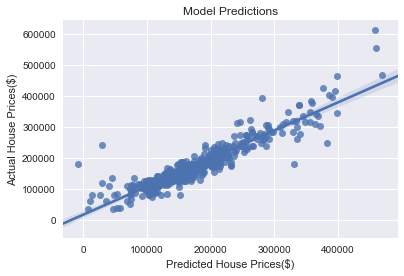

In [21]:
g = sns.regplot(x=lm.predict(X_test), y=Y_test, fit_reg=True)
g.set(xlabel='Predicted House Prices($)', ylabel='Actual House Prices($)', title='Model Predictions')

From the graph above the model seems to be a good fit for the data, except for a few outliers in the houses highly priced.

Let us calcualte $R^2$ and RMSE (Root Mean Square Error) for the train and test sets to further assess the model.

$R^2$: It is the percentage of the response variable variation that is explained by a linear model

RMSE: It is the square root of the mean of squared errors. Squared errors are the difference of actual and predicted values sqaured.

In [22]:
# R2 for train and test data
R2_reg_train = lm.score(X_train,Y_train)
R2_reg_test = lm.score(X_test,Y_test)
print('R squared for train data is: %.3f' %(R2_reg_train))
print('R squared for test data is: %.3f' %(R2_reg_test))

R squared for train data is: 0.936
R squared for test data is: 0.843


- The train set explains more varaince (93.6%) than the test set (84.3%). This is quite common because the model is trained on training data, training set's $R^2$ is always greater than the test set's $R^2$.
- An $R^2$ of 0.843 is a good score to start with. 
- Since the train score is more than test score, let us see if it is a case of Overfitting by plotting a Residual Plot

In [23]:
from math import sqrt
RMSE_reg_train = sqrt(np.mean((Y_train - lm.predict(X_train))**2))
RMSE_reg_test = sqrt(np.mean((Y_test - lm.predict(X_test))**2))
print('Root mean squared error for train data is: %.3f' %(RMSE_reg_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_reg_test))

Root mean squared error for train data is: 20426.160
Root mean sqaured error for test data is: 30352.931


**Residual Plots**

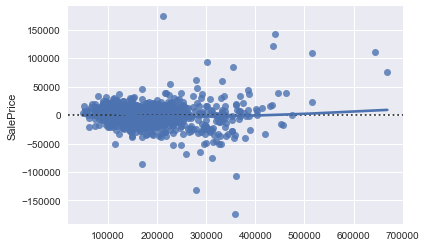

In [24]:
sns.residplot(x=lm.predict(X_train), y=Y_train, lowess=True)

Residual plot for the training data shows that the data points lie between \$-50,000 to \$50,000. 

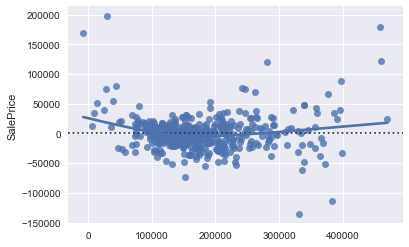

In [25]:
sns.residplot(x=lm.predict(X_test), y=Y_test, lowess=True)

Test data is also showing the same range from the reference line.

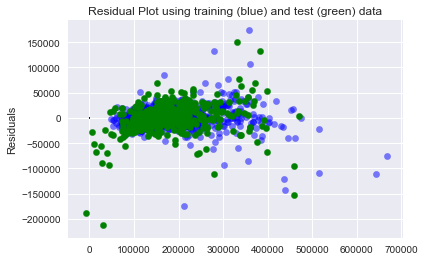

In [26]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

The blue dots represent train data and grren dots represent test data. From the residual plot above it is evident that the model is a good fit for test data as well. The data lies between +/- \$50,000 from the reference line. 

**Analysis:** 
- The regression line appears to be a **good fit for the data**.
- The train and test scores not being too different form each other, indiactes that there is **no Overfitting**.
- The distribution of test and train data looks similar in the residual plot, which says that there is **no big difference in residuals**. And the data is spread around -50,000 and 50,000. 
- In terms of the actual problem we can infer that there might be a difference of \$50,000 for every house if important features like Aminities, Full bath in basement, Quality of finished square footage, Overall condition and quality of the house, Remodel date etc. 
- This seems to be relevant in the real world scenario in real estate market. For example the difference between a basement house and a non-basement house is \$50,000. Similarly an increase in number of bedrooms/ bathrooms/ square footage can increase the price of the house by \$30,000 - \$40,000.
- Clearly the **important features** that control the house price are the **Condition, Square footage(basement, 1st & 2nd floors), Garage area, Year built/remodeled**.

# Regularization

With as many as 306 features in the model it is natural for the model to get quite complex. The model sticks too much to the data and the model has probably learned the background noise which results in high variance while being fit, which leads to **Overfitting**. This results in poor prediction and generalization power when applied o data outside the training set. To overcome this problem **regularization technique** is used. 

To find the best model, the common method in machine learning is to define a loss or cost function that describes how well the model fits the data. The goal is to find the model that minimzes this loss function. The idea is to penalize this loss function by adding a complexity term that would give a bigger loss for more complex models. 

**Regularization** allows to shrink the coefficients to zero by introducing a tuning parameter **'lambda'** or **'alpha'**. This ensures:
- Shrinking of parameters, therefore it is mostly used to prevent multicollinearity.
- Reduces the model complexity by coefficient shrinkage.

The two popular methods used to regularize parameters are:
- Ridge Regression
- Lasso Regression

**Ridge Regression:** Ridge regression uses L2 penalty to penalize coefficients. L2 penalty is the penalty equivalent to **square of the magnitude of coefficients** 

**Lasso Regression:** Lasso regression uses L1 penalty which is the **absolute value of the magnitude of coefficients**

Let us apply Ridge and Lasso models to our data

**1. Ridge Regression**

In [27]:
# Define the alphas 
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
# Create an object for RidgeCV
ridge_reg = RidgeCV(alphas=alphas, cv=None, store_cv_values=True)
# Fit the model to our training data
ridge_reg.fit(X_train,Y_train)

RidgeCV(alphas=[1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01, 1, 5, 10],
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

Let us calculate the $R^2$ on both train and test sets to assess the performance of our model.

In [28]:
# R2 for train and test data respectively
R2_ridge_train = (ridge_reg.score(X_train, Y_train))
R2_ridge_test = (ridge_reg.score(X_test,Y_test))
print('R squared for train data is: %.3f' %(R2_ridge_train))
print('R squared for test data is: %.3f' %(R2_ridge_test))

R squared for train data is: 0.898
R squared for test data is: 0.887


- The **train set** explains obtained an $R^2$ of **0.898** and **test set** got an $R^2$ of **0.887**.
- There is very little difference between train and test set, this signifies that the **model is a good fit for data**.

Let us calculate the RMSE values for train and test data sets

In [29]:
RMSE_ridge_train = sqrt(np.mean((Y_train - ridge_reg.predict(X_train))**2))
RMSE_ridge_test = sqrt(np.mean((Y_test - ridge_reg.predict(X_test))**2))
print('Root mean squared error for train data is: %.3f' %(RMSE_ridge_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_ridge_test))

Root mean squared error for train data is: 25725.420
Root mean sqaured error for test data is: 25777.429


**Regression Plot**

Let us draw a regression plot between the actual and predicted house prices to see how well the regresssion line fits tha data.

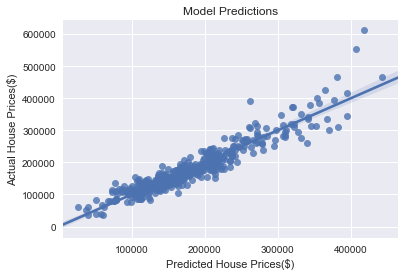

In [30]:
# Regression plot between actual and predicted prices 
g = sns.regplot(x=ridge_reg.predict(X_test), y=Y_test, fit_reg=True)
g.set(xlabel='Predicted House Prices($)', ylabel='Actual House Prices($)', title='Model Predictions')

The regression line looks like a good fit to the data, except for a few outliers in the higher house price range.

**Residual Plots**

To drill down further let us plot some residual plots which helps giving better idea about the data. I decided to plot residual plots for train and test data seperately and another plot depicting train and test data points to get a better visual on data.

_Residual Plot - Train data_

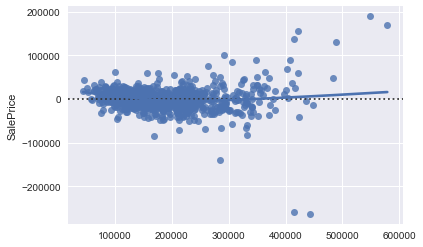

In [31]:
sns.residplot(x=ridge_reg.predict(X_train), y=Y_train, lowess=True)

The data seems to be close to the reference line (at 0). The data is spread around $-50,000 to $50,000 which is quite normal in real estate market.

_Residual Plot - Test data_

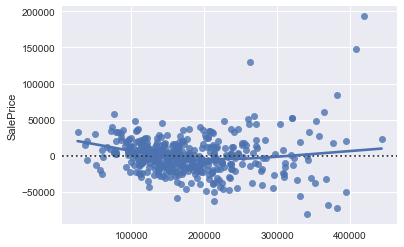

In [32]:
sns.residplot(x=ridge_reg.predict(X_test), y=Y_test, lowess=True)

The residual plot for test data looks similar to the train data which is a good sign. We can see that the major percent of data lies within teh $-50,000 and $50,000 range which is the same as train data. Except for that there are a few outliers which is natural when the model is exposed to data outside the training data set.

_Residual Plot - Train and Test data_

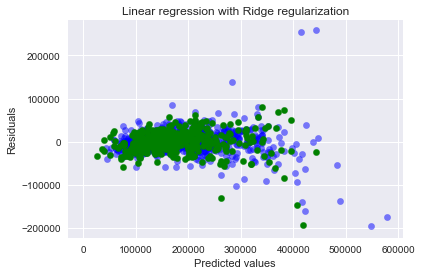

In [33]:
plt.scatter(ridge_reg.predict(X_train), ridge_reg.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(ridge_reg.predict(X_test), ridge_reg.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel('Residuals')

The residual plot clearly explians how similar the train and test data are in the graph. This tells that the model provides good results on the test data too.

Let us look at the features and thier respective coefficients to know which features have positive and negative correlation with the target variable 'Sale Price'

In [34]:
# Features and thier respective coefficients
ridge_coeffs_df = pd.DataFrame(list(zip(X.columns, ridge_reg.coef_)), columns = ['Features', 'Estimated_Coefficients'])
ridge_coeffs_df.sort_values(by='Estimated_Coefficients', ascending=False)

,Features,Estimated_Coefficients
16,BsmtFullBath,15120.595840
4,OverallCond,14442.505839
14,LowQualFinSF,12992.951015
26,GarageArea,11016.749147
13,2ndFlrSF,5919.494230
5,YearBuilt,5738.125302
23,Fireplaces,5154.235404
6,YearRemodAdd,5140.174280
3,OverallQual,4739.258703
19,HalfBath,4460.987753


Let us look a the positive and negative coefficients seperately

In [35]:
ridge_pos_coeffs_df = ridge_coeffs_df[(ridge_coeffs_df['Estimated_Coefficients'])>=0].sort_values(by='Estimated_Coefficients', ascending=False)
ridge_pos_coeffs_df

,Features,Estimated_Coefficients
16,BsmtFullBath,15120.595840
4,OverallCond,14442.505839
14,LowQualFinSF,12992.951015
26,GarageArea,11016.749147
13,2ndFlrSF,5919.494230
5,YearBuilt,5738.125302
23,Fireplaces,5154.235404
6,YearRemodAdd,5140.174280
3,OverallQual,4739.258703
19,HalfBath,4460.987753


- Let us look at the top five important coefficients having linear correlation with the target variable 'Sale Price'. 
- **BsmtFullBath, OverallCond, LowQualFinSF, GarageArea, 2ndFlrSF** in Ridge Regression are different from the positive coefficients (MiscVal, BsmtFullBath, LowQualFinSF, OverallCond, YearRemodAdd) produced in Multiple Linear Regression.
- This analysis says that aminities and year remodeled are not very important anymore.
- Therefore we can conclude that a full bath in basement, overall condition of the house and low quality square footage are the most consistent correalted features to boast the Sale price of the house.

In [36]:
ridge_neg_coeffs_df = ridge_coeffs_df[(ridge_coeffs_df['Estimated_Coefficients'])<0].sort_values(by='Estimated_Coefficients',ascending = True)
ridge_neg_coeffs_df

,Features,Estimated_Coefficients
1,LotFrontage,-6482.443966
2,LotArea,-3161.394589
22,TotRmsAbvGrd,-2784.507511
21,KitchenAbvGr,-2447.693972
9,BsmtFinSF2,-1799.930374
12,1stFlrSF,-1609.154838
25,GarageCars,-972.311277
27,WoodDeckSF,-593.196962
35,YrSold,-527.354429
29,EnclosedPorch,-306.981433


Now let us look at the negative coefficients. We can clearly see that Lot Frontage (front yard of the house) is now the most negatively correlated feature to the Sale Price.

Therefore we can say that if the front yard is more (probably more than back yard), number of rooms above ground is more then the Sale Price will decrease.

I strongly believe that Kitchen above ground (according to our data above basement) might not really mean above basement because everyone prefers kitchen in the ground floor. This will hold right for houses without basement and the kitchen is above the ground i.e. on the 1st floor. This ideally would decrease the house price.

The other features that decrease house price are Lot area, total rooms above ground and Basement (type 2) finished area. 

Note: Basement (type 2) - If a house has more than one basement.

**Cross Validation**

When evaluating different hyperparameters for estimators, such as the alpha is this setting that must be manually set for an Ridge, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.Even though the model is trained exclusively on the training data, we are optimizing hyperparameters based on the test set. As such, estimate of performance can be optimistic, because we are essentially reporting best-case results.

Another way to deal with this is through cross-validation (CV). In CV a test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets. A model is trained using k-1 of the folds as training data; the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

**GridSearchCV**

Let us explore the **best hyper parameter (alpha)** and it's respective **score** using **GridSearchCV**

In [37]:
# Create an object of type Ridge()
ridge = Ridge()
# Fit the model on the trainng data.
ridge.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

**Apply GridSearchCV to Ridge Regression find out the alpha value and respective R square**

In [38]:
# Import library to find out score (R2)
from sklearn.metrics import r2_score

# Define an array of alpha values
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

# Define GridSearchCV 
ridge_grid = GridSearchCV(estimator=ridge, param_grid = dict(alpha=alphas), scoring = 'r2')

# Fit the training model 
ridge_grid.fit(X_train, Y_train)

# Get the best alpha value and it's respective R2 score
print("Best alpha value is: %s" % ridge_grid.best_params_["alpha"])
print("Accuracy from alpha = %s: %s \n" % (ridge_grid.best_params_["alpha"],r2_score(ridge_grid.predict(X_test), Y_test)))

Best alpha value is: 10
Accuracy from alpha = 10: 0.872876954748 



Let us compare the R2 scores for train and test data using GridSearchCV

In [39]:
R2_ridge_grid_train = r2_score(ridge_grid.predict(X_train), Y_train)
R2_ridge_grid_test = r2_score(ridge_grid.predict(X_test), Y_test)
print('R squared for train data is: %.3f' %(R2_ridge_grid_train))
print('R squared for test data is: %.3f' %(R2_ridge_grid_test))

R squared for train data is: 0.882
R squared for test data is: 0.873


**Let us repeat the same process to find out RMSE values for train and test data sets**

In [40]:
# Import library to find out score MSE
from sklearn.metrics import mean_squared_error

# Define an array of alpha values
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

# Define GridSearchCV 
ridge_grid = GridSearchCV(estimator=ridge, param_grid = dict(alpha=alphas), scoring = 'neg_mean_squared_error')

# Fit the training model 
ridge_grid.fit(X_train, Y_train)

# Get the best alpha value and it's respective RMSE score
print("Best alpha value is: %s" % ridge_grid.best_params_["alpha"])
print("Accuracy from alpha = %s: %s \n" % (ridge_grid.best_params_["alpha"],
                                           sqrt(mean_squared_error(ridge_grid.predict(X_test), Y_test))))

Best alpha value is: 10
Accuracy from alpha = 10: 25777.428925228076 



Let us compare the RMSE scores for train and test data using GridSearchCV

In [41]:
RMSE_ridge_grid_train = sqrt(mean_squared_error(ridge_grid.predict(X_train), Y_train))
RMSE_ridge_grid_test = sqrt(mean_squared_error(ridge_grid.predict(X_test), Y_test))
print('Root mean squared error for train data is: %.3f' %(RMSE_ridge_grid_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_ridge_grid_test))

Root mean squared error for train data is: 25725.420
Root mean sqaured error for test data is: 25777.429


**We can conclude that the best alpha value is 10 for Ridge Regression**

**2. Lasso Regression**

In [42]:
# Define the alphas 
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
# Create an object for LassoCV
lasso_reg = LassoCV(alphas=alphas, cv=None, max_iter=50000, tol=0.1,selection='random')
# Fit the model to our training data
lasso_reg.fit(X_train,Y_train)

LassoCV(alphas=[1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01, 1, 5, 10],
    copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=50000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='random', tol=0.1,
    verbose=False)

Let us calculate the $R^2$ on both train and test sets to assess the performance of our model.

In [43]:
# R2 for train and test data respectively
R2_train = (lasso_reg.score(X_train, Y_train))
R2_test = (lasso_reg.score(X_test,Y_test))
print('R squared for train data is: %.3f' %(R2_train))
print('R squared for test data is: %.3f' %(R2_test))

R squared for train data is: 0.915
R squared for test data is: 0.859


- The train set explains obtained an $R^2$ of 0.91 and test set got an $R^2$ of 0.86.
- There is not a huge difference between train and test set, this signifies that the model is a good fit for data, because it performed well when exposed outside of the training data .

Now let us calculate the RMSE scores for train and test data sets

In [45]:
RMSE_train = sqrt(np.mean((Y_train - lasso_reg.predict(X_train))**2))
RMSE_test = sqrt(np.mean((Y_test - lasso_reg.predict(X_test))**2))
print('Root mean squared error for train data is: %.3f' %(RMSE_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_test))

Root mean squared error for train data is: 23551.400
Root mean sqaured error for test data is: 28728.040


**Regression Plot**

Let us plot a regression plot to see how good of a fit is our regression line on the data

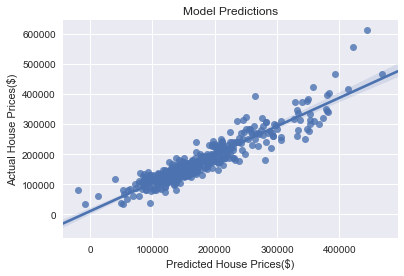

In [46]:
# Regression plot
g = sns.regplot(x=lasso_reg.predict(X_test), y=Y_test, fit_reg=True)
g.set(xlabel='Predicted House Prices($)', ylabel='Actual House Prices($)', title='Model Predictions')

It is quite evident that the regression line is a good fit to our data.

**Residual Plots**

I plotted residual graphs for train, test seperatley and together using lasso regression.

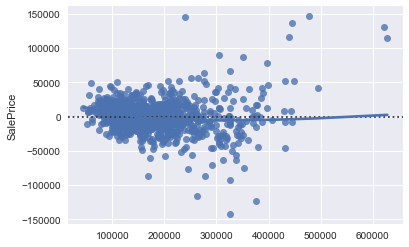

In [47]:
sns.residplot(x=lasso_reg.predict(X_train), y=Y_train, lowess=True)

The graph looks very much similar to what was produced by Linear Regression and Ridge Regression. The data lies within the -50,000 to +50,000 range where most of the data lies close to the reference line.

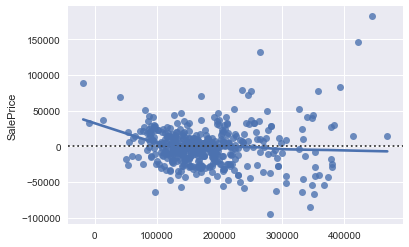

In [48]:
sns.residplot(x=lasso_reg.predict(X_test), y=Y_test, lowess=True)

The data points are scattered around the reference line. There are few outliers, but most of the data lies with the expected -50,000 to +50,000 range.

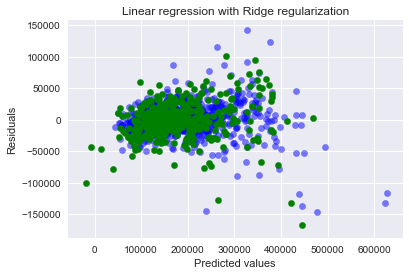

In [49]:
plt.scatter(lasso_reg.predict(X_train), lasso_reg.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lasso_reg.predict(X_test), lasso_reg.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel('Residuals')

From the graph the train and test data points are close to each other indicating that the model is performing well on the test data too.

Let us see what coefficients does lasso regression produce and what are the top features that influence Sale price.

In [50]:
# Features and thier respective coefficients
lasso_coeffs_df = pd.DataFrame(list(zip(X.columns, lasso_reg.coef_)), columns = ['Features', 'Estimated_Coefficients'])
lasso_coeffs_df.sort_values(by='Estimated_Coefficients', ascending=False)

,Features,Estimated_Coefficients
13,2ndFlrSF,20021.418177
27,WoodDeckSF,10364.019613
33,MiscVal,10324.958863
4,OverallCond,9562.160355
23,Fireplaces,5228.051716
3,OverallQual,4246.326847
19,HalfBath,4091.780878
8,BsmtFinSF1,3813.583395
5,YearBuilt,2764.105967
32,PoolArea,2693.267125


In [51]:
lasso_pos_coeffs_df = lasso_coeffs_df[(lasso_coeffs_df['Estimated_Coefficients'])>=0].sort_values(by='Estimated_Coefficients', ascending=False)
lasso_pos_coeffs_df

,Features,Estimated_Coefficients
13,2ndFlrSF,20021.418177
27,WoodDeckSF,10364.019613
33,MiscVal,10324.958863
4,OverallCond,9562.160355
23,Fireplaces,5228.051716
3,OverallQual,4246.326847
19,HalfBath,4091.780878
8,BsmtFinSF1,3813.583395
5,YearBuilt,2764.105967
32,PoolArea,2693.267125


As we can see the features changed from what we saw in Ridge rgression, Lasso results show added new features such as MasVnrArea - type of material used in external of  the house (brick/ stone etc.),  GarageYrBlt - garage biult year. The other features remain same as the other regression models i.e. 2ndFlrSF  LowQualFinSF OverallCond.

The results of Lasso regression (MasVnrArea and GarageYrBlt) seem to be unrealistic in real estate market. 

In [52]:
lasso_neg_coeffs_df = lasso_coeffs_df[(lasso_coeffs_df['Estimated_Coefficients'])<0].sort_values(by='Estimated_Coefficients', ascending=True)
lasso_neg_coeffs_df

,Features,Estimated_Coefficients
11,TotalBsmtSF,-3532.661236
25,GarageCars,-1729.835422
22,TotRmsAbvGrd,-1715.794013
2,LotArea,-1199.661881
30,3SsnPorch,-755.635422
15,GrLivArea,-588.742108
1,LotFrontage,-484.799268
34,MoSold,-85.392126


Lasso produced slightly differnt results from Ridge with order of features changed and adding features like Fireplaces and Year built.

**GridSearchCV**

Let us explore the **best hyper parameter (alpha)** and it's respective **score** using **GridSearchCV**

In [53]:
# Create an object 
lasso = Lasso(max_iter = 50000, tol=0.1)

# Fit the model on the trainng data
lasso.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=50000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.1, warm_start=False)

**Apply GridSearchCV to Ridge Regression find out the alpha value and respective R square**

In [54]:
# Import library to find out score (R2)
from sklearn.metrics import r2_score

# Define an array of alpha values
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

# Define GridSearchCV 
lasso_grid = GridSearchCV(estimator = lasso, param_grid = dict(alpha=alphas), scoring='r2')

# Fit the training model 
lasso_grid.fit(X_train, Y_train)

# Get the best alpha value and it's respective R2 score
print('Best alpha value is: %s' % lasso_grid.best_params_['alpha'])
print('Score when alpha = %s: is %s \n' % (lasso_grid.best_params_['alpha'],r2_score(lasso_grid.predict(X_test), Y_test)))

Best alpha value is: 10
Score when alpha = 10: is 0.819865195821 



Let us compare the R2 scores for train and test data using GridSearchCV

In [55]:
R2_lasso_grid_train = r2_score(lasso_grid.predict(X_train), Y_train)
R2_lasso_grid_test = r2_score(lasso_grid.predict(X_test), Y_test)
print('R squared for train data is: %.3f' %(R2_lasso_grid_train))
print('R squared for test data is: %.3f' %(R2_lasso_grid_test))

R squared for train data is: 0.898
R squared for test data is: 0.820


**Let's repeat the same using Lasso & GridSearchCV process to find out RMSE values for train and test data sets**

In [56]:
# Import library to find out score MSE
from sklearn.metrics import mean_squared_error

# Define an array of alpha values
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

# Define GridSearchCV 
lasso_grid = GridSearchCV(estimator = lasso, param_grid = dict(alpha=alphas), scoring='neg_mean_squared_error')

# Fit the training model
lasso_grid.fit(X_train, Y_train)

# Get the best alpha value and it's respective RMSE score
print("Best alpha value is: %s" % lasso_grid.best_params_["alpha"])
print("Accuracy from alpha = %s: %s \n" % (lasso_grid.best_params_["alpha"],
                                           sqrt(mean_squared_error(lasso_grid.predict(X_test), Y_test))))

Best alpha value is: 10
Accuracy from alpha = 10: 33835.537049658975 



Let us compare the RMSE scores for train and test data using GridSearchCV

In [57]:
RMSE_lasso_grid_train = sqrt(mean_squared_error(lasso_grid.predict(X_train), Y_train))
RMSE_lasso_grid_test = sqrt(mean_squared_error(lasso_grid.predict(X_test), Y_test))
print('Root mean squared error for train data is: %.3f' %(RMSE_lasso_grid_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_lasso_grid_test))

Root mean squared error for train data is: 25386.622
Root mean sqaured error for test data is: 33835.537


**We can conclude that the best alpha value is 10 for Lasso Regression**

# Comparing the models

Let us compare all the models and evaluate one model that is best suited to the data, this can be acheived by comparing the scores of train and test sets for each model. 

In [58]:
from collections import OrderedDict
# Create a dictionary to store the train and test scores, best alpha values
scores = {'Index': ['Linear Reg','RidgeCV Reg','LassoCV Reg', 'Ridge_GridSearchCV', 'Lasso_GridSearchCV'],
         'RMSE_train': [20426.160, 25725.420, 26498.918, 25725.420, 25386.622],
         'RMSE_test': [30352.931, 25777.429, 25777.429, 25777.429, 33835.537],
         'R2_train': [0.936, 0.898, 0.927, 0.882,0.898 ],
         'R2_test': [0.843, 0.887, 0.880, 0.873, 0.820],
         'Best_alpha': [np.nan, np.nan, np.nan, 10, 10]}
scores = OrderedDict(scores)

# Create a dataframe from the dictionary
reg_models_scores = pd.DataFrame.from_dict(scores)
reg_models_scores

,Index,RMSE_train,RMSE_test,R2_train,R2_test,Best_alpha
0,Linear Reg,20426.160,30352.931,0.936,0.843,NaN
1,RidgeCV Reg,25725.420,25777.429,0.898,0.887,NaN
2,LassoCV Reg,26498.918,25777.429,0.927,0.880,NaN
3,Ridge_GridSearchCV,25725.420,25777.429,0.882,0.873,10.0
4,Lasso_GridSearchCV,25386.622,33835.537,0.898,0.820,10.0


The scores produced by Ridge Regression doesn't vary much, both RMSE and R2 of train and test data sets are not far from each other. The same is the case with Ridge using GridSearch Cross Validation. 

Therefore by lookig at the scores, regression plots and residual plots I feel that Ridge Regression using Cross Validation is the best model for the data. Having said that let us look at the features that are positively and negatively correlated with the Sale Price using Ridge Cross Validation method. 

The top ten important features that are positively correlated with Sale Price are:
1. A full bath in Basement
2. Overall Condition of the house
3. Low quality finished area of the house (sqft)
4. Area of Garage (sqft)
5. Square footage of 2nd floor
6. Built year of the house
7. No. of Fireplaces	
8. Year remodeled
9. Overall quality of the house
10. No. of Half baths above basement/ ground floor (for houses without basement)

The presence/ increase of the above features increases the Sale Price of a house

The top ten important features that are negatively correlated with the Sale Price are:
1. Front yard of the house (if more than back yard)
2. Area of the lot
3. Total rooms above basement/ ground floor (for houses without basement)
4. Kitchen above ground floor
5. Second basement finished square footage
6. Area of 1st floor (sqft)
7. Garage capacity (no. of cars it can accommodate)
8. Area of Wooden Deck
9. Year Sold	
10. Enclosed Porch	

The absence/ decrease of the above features increases the Sale Price of a house.